# TP2 - Optimisation

### CACHEUX Nolan , MONTUORI Milo , DENIS Guillaume

<div class="alert-info">

   #### Question 1

Utilisez la méthode de Nelder-Mead pour déterminer les minimums locaux de la fonction d’Himmelblau définie par $∀(x,y)∈[−4,4]^2 , f(x,y) = (x^2+y−11)^2+ (x+y^2−7)^2.$
    
</div>

In [1]:
x,y = var("x,y") # defines  symbolic  variables
f(x,y) = (x**2+y-11)**2 + (x+y**2-7)**2 # defines a function
#p = [3,3] # defines  point  (3,3)
#f(*p) # evaluates f(3,3) ; do not  forget  the * operator  to  unfold  the  list as 3,3

plot3d(f(x,y), (x,-4,4), (y,-4,4),aspect_ratio=1, plot_points=50)


Graphics3d Object

In [2]:
def sort(simplexe ,f):
    fvals = [f(*p) for p in  simplexe]
    idx = sorted(range(len(fvals)), key=lambda k: fvals[k])
    return [simplexe[x] for x in idx]

def centre_gravite(p1,p2):
    return [(p1[0] + p2[0])/2,(p1[1] + p2[1])/2]

#On crée une fonction pour chacune des transformations afin que le code soit moins répétitif.
def transfo(p0,rapport,pa):
    
    return [p0[0] - rapport*(p0[0] - pa[0]),p0[1] - rapport*(p0[1] - pa[1])]

In [3]:
#On prendra par la suite : 

rapport_reflexion = -1
rapport_expansion = 2
rapport_contraction = 0.5
rapport_sigma = rapport_contraction
nb_iterations = 25

    
#1. On choisit trois points d'un ouvert de R2 
#pour former le simplexe {p1,p2,p3} que l'on passe en paramètre de notre fonction

def nelderMead(p1,p2,p3):

    #(-1,-1),(-3,-2)et(-2,-4)

    simplexe = []

    simplexe.append(p1)
    simplexe.append(p2)
    simplexe.append(p3)

    print("Simplexe {p1,p2,p3} au début: ",simplexe)


    ###img = list_plot(simplexe,rgbcolor=hue(1), size=30)
    img = []
    img.append(simplexe)

    for i in range(nb_iterations): 

        #2.On calcule les valeurs de la fonction f aux points du simplexe")

        #print("f(p1),f(p2),f(p3) :",[f(*p) for p in  simplexe])

        #On renumérote les points du simplexe de sorte que f(p1)≤f(p2)≤f(p3) en utilisant la fonction sort.")

        simplexe = sort(simplexe,f)

        #print("f(p1),f(p2),f(p3) :",[f(*p) for p in simplexe])

        ###img +=  list_plot(simplexe,rgbcolor=hue(1), size=30)
        img.append(list(simplexe))

        #3. On calcule p0 le centre de gravité du segment [p1 p2]")

        p0 = centre_gravite(simplexe[0],simplexe[1])

        #print("p0 :", p0)

        #4 On calcule la réflexion de p3 par rapport à p0.")

        pr = transfo(p0,rapport_reflexion,simplexe[2])
    

        #Si f(p1)≤f(pr)≤f(p2) alors on remplace p3 par pr et on retourne à l’étape 2.
        p1 =(simplexe[0][0],simplexe[0][1])
        p2 =(simplexe[1][0],simplexe[1][1])
        p3 =(simplexe[2][0],simplexe[2][1])

        if f(*pr)>=f(*p1) and f(*pr)<=f(*p2) :
            simplexe[2] = pr

        elif f(*pr)<f(*p1) : #Si f(pr)< f(p1) alors on calcule :
            pc = transfo(p0,rapport_expansion,pr)
            # Il y a deux cas :
            if f(*pc)<=f(*pr):
                simplexe[2] = pc
            else :
                simplexe[2] = pr

        elif f(*pr) > f(*p2) :
            pc = transfo(p0,rapport_contraction,simplexe[2])
             # Il y a deux cas :
            if f(*pc) < f(*p3) :
                simplexe[2] = pc
            else :
                #Sinon, on fait une homothétie du simplexe, de rapportσet de centre p1
                # ∀i∈{1,2,3}, pi→p1−σ(p1−pi)
                for i in range(1,4,1):
                    simplexe[i-1]=[simplexe[0][0]-rapport_sigma*(simplexe[0][0]-simplexe[i-1][0]),
                                   simplexe[0][1]-rapport_sigma*(simplexe[0][1]-simplexe[i-1][1])]


    print("Simplexe {p1,p2,p3} à la fin : ",simplexe)
    return img

In [4]:
#POUR L'ANIMATION 

def discretize(xmin, xmax, n): 
    dx = (xmax-xmin)/n 
    return [xmin + dx*i for i in range(n)]


# compute n contours from z1 to z2
zmin, zmax = 30, 250
n = 10 # number of levels 
levels = discretize(zmin, zmax, n) # do not forget to execute the cell with this function 

def animation(img):
    
    contour = contour_plot(f(x,y), (x,-4,4), (y,-4,4), 
                          contours=levels, 
                          cmap="jet", 
                          fill=True, 
                          colorbar=True)
    r = []
    for i in range(0, len(img)):
        pt = ((img[i][0][0],img[i][0][1]),(img[i][1][0],img[i][1][1]),(img[i][2][0],img[i][2][1]),(img[i][0][0],img[i][0][1]))

        r += [contour + line(pt,color = 'red')]


    show(animate(r))

Tout au long de l'algorithme, le simplexe diminue, plus il y a d'itérations, plus nous nous rapprochons du minimum local. A la fin des itérations, les 3 points sont très proches et le simplexe est suffisamment petit, les valeurs de f aux sommets du simplexe fournissent donc une estimation d’un minimum local de f.


Simplexe {p1,p2,p3} au début:  [[-2, -2], [-2, 2], [2, 0]]
Simplexe {p1,p2,p3} à la fin :  [[-2.80359873175621, 3.12298604846001], [-2.80810213088989, 3.14270639419556], [-2.81123938411474, 3.12933813780546]]


Animation with 26 frames
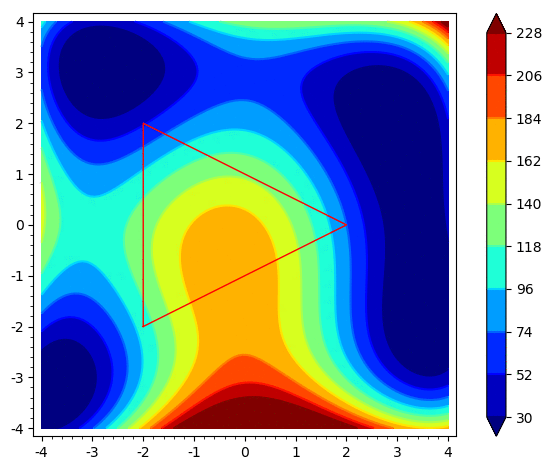

In [5]:
#On teste notre programme avec un simplexe initial qui ne pose pas de problème :

p1 = [-2,-2] 
p2 = [-2,2]
p3 = [2,0] 

img = nelderMead(p1,p2,p3)
animation(img)


Simplexe {p1,p2,p3} au début:  [[-1, -1], [-3, -2], [-2, -4]]
Simplexe {p1,p2,p3} à la fin :  [[-3, -2], [-2, 1], [-2.49999991059303, -0.500000029802322]]


Animation with 26 frames
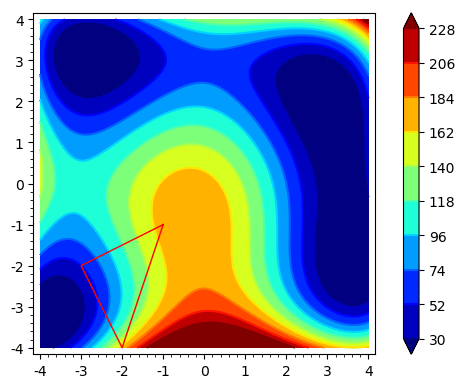

In [6]:
#On teste notre programme avec un simplexe initial qui est pathogène, on a une dégénérescence :

p1 = [-1,-1] 
p2 = [-3,-2]
p3 = [-2,-4] 

img = nelderMead(p1,p2,p3)
animation(img)




#### Pourquoi le simplexe initial construit avec les points (−1,−1), (−3,−2) et (−2,−4) est pathogène ?

Dès la deuxième itération de notre programme, le simplexe est formé des points : 
    
    p1 = (-3, -2) et p2 = (-2, 1)
    
Or :

In [7]:
print("f(p1) =",f(*[-3,-2]),", f(p2) =",f(*[-1, -1]))

f(p1) = 52 , f(p2) = 170


Dès le début de notre algorithme, on remarque que f(pr) est compris entre f(p1) et f(p2) et ce même après plusieurs itérations. Si f(p1) ≤ f(pr) ≤ f(p2), alors on remplace p3 par pr puis on retourne à l’étape 2. Donc p1 et p2 ne sont plus du tout remplacés dès la 2ème itération.

Or, pr dépend de p0, le centre de gravité de p1 et p2, qui ne change donc pas car p1 et p2 ne sont pas remplacés, et de p3 qui, à chaque itération, ne varie que très peu étant donné que sa variation dépend de p0 qui lui ne varie pas.

Ainsi, f(pr) est toujours compris entre f(p1) et f(p2) et donc l'algorithme ne fait que remplacer p3 par pr à chaque itération.

Le simplexe ne nous fournit donc pas une estimation d'un minimum local, puisque p1 et p2 ne changent plus après deux itérations.

Pour une fonction $f:U ⊂ R^2→R$ de classe C1 avec U un ouvert de $R^2$, le gradient est le vecteur composé des dérivées partielles de f par rapport à x et par rapport à y, les points critiques sont les points tels que le gradient de f depuis le point P est égal au vecteur nul.

<div class="alert-info">

   #### Question 2

— Implémenter une fonction recherche_min$(f, P0, h, N, delta, eps) $
qui réalise une descente de gradient sur la fonction f.

— Déterminer un minimum de la fonction $f(x,y) =−(x^2e^{2x−1}+ 4y^2)e^{−x^2−y^2}$
en partant du point $P_0= (1,2)$.On prendra $N= 1000,h= 0.1,ε=δ= 10^−3.$ 

N’hésitez pas à jouer sur ces paramètres,à visualiser les contours 
de la fonction, le champ de gradient, la suite de points$(P_n,f(P_n))$, etc.
    
</div>

In [8]:
def descenteG(f, x, y, delta, eps, maxIter, h):
    # Recherche le minimum d'une fonction f par descente de gradient avec dérivée numérique
    # x,y sont les valeurs initiales
    # delta est le taux d'apprentissage qui détermine la rapidité de la descente
    # eps est la précision souhaitée
    # maxIter est le nombre maximum d'itération
    # h est le pas de descente
    
    Nograd = 1  #Norme du gradient
    i=0         #Nombre d'itération
    Pfi = []    #Tableau final des positions du minimum (futur point rouge)
    
    while abs(Nograd)>delta:
    #for i in range(maxIter -1):
    
        #Nous n'avons pas réussi a obtenir les bons résultats avec la fonction f.gradient,
        #On a donc calculé les dérivées selon une autre méthode:
        
        gradx = (f(x+eps,y)-f(x-eps,y))/(2*eps) #approximation numérique de la dérivée df/dx
        grady = (f(x, y+eps)-f(x, y-eps))/(2*eps) #approximation numérique de la dérivée df/dy
        
        Nograd = math.sqrt(gradx**2+grady**2) # norme du gradient
        
        x = float(x-h*gradx) # on effectue un petit pas de coeficient h vers le bas selon x 
        y = float(y-h*grady) # on effectue un petit pas de coeficient h vers le bas selon y
        i += 1
        
        #print(i, x, y, gradx, grady) #décommenter cette ligne pour imprimer les itérations
        Pfi.append([x,y])
        
        if i > maxIter:
            return Pfi #abandon si le nombre d'itérations est trop élevé
    
    return Pfi


# Préparation des valeurs et de la fonction pour la descente de gradient
x,y = var("x,y")
f(x,y) = -(x^2*exp(2*x - 1) + 4*y^2)*exp(-x^2-y^2)
P0 = [1,2]
N = 2000
h = 0.01
eps = 0.001
delta = eps

#Le tableau retourné par la fonction est enregistré dans Pf
Pf =  descenteG(f, P0[0],P0[1], delta, eps, N, h)

#on affiche la forme de la fonction, ici en bleu
img = plot3d(f(x,y), (x,-2.5,2.5), (y,-2.5,2.5), aspect_ratio=[1,1,1], plot_points=50, opacity=0.8)

#on affiche chaque point de la fonction, enregistré dans Pf, ici des ronds rouges
for i in range (0, len(Pf)):
    img+= point3d((Pf[i][0],Pf[i][1],f(Pf[i][0],Pf[i][1])), size=20, color='red')

img



Graphics3d Object

In [9]:
minimum = plot3d(f(x,y), (x,-2.5,2.5), (y,-2.5,2.5), aspect_ratio=[1,1,1], plot_points=50, opacity=0.8)

minimum += point3d((Pf[-1][0],Pf[-1][1],f(Pf[-1][0],Pf[-1][1])), size=30, color='red')
#Le minimum local trouvé est la dernière valeur du tableau retourné par notre fonction.

print("Minimum local en partant du point (1,2): (",Pf[-1][0],",",Pf[-1][1],")")
minimum

Minimum local en partant du point (1,2): ( 0.0003606041523848136 , 1.0000001274990526 )


Graphics3d Object

Le gradient est un vecteur qui pointe dans la direction de plus forte montée lorsqu’on est situé au point P. 
Si on descend le gradient de la fonction $f(x,y) =−(x^2exp(2x−1)+ 4y^2)exp(−x^2−y^2)$ depuis le point P,on se
rapproche donc du minimum local.

On peut changer de point de départ afin que la descente de gradient nous donne l'approximation d'un autre minimum local. Par exemple le point(1,1), 

In [10]:
P0 = [1,1]

Pf =  descenteG(f, P0[0],P0[1], delta, eps, N, h)
minimum = plot3d(f(x,y), (x,-2.5,2.5), (y,-2.5,2.5), aspect_ratio=[1,1,1], plot_points=50, opacity=0.8)

minimum += point3d((Pf[-1][0],Pf[-1][1],f(Pf[-1][0],Pf[-1][1])), size=30, color='red')
#Le minimum local trouvé est la dernière valeur du tableau retourné par notre fonction.

print("Minimum local en partant du point (1,1): (",Pf[-1][0],",",Pf[-1][1],")")
minimum

Minimum local en partant du point (1,1): ( 1.6180317060989193 , 0.0003148772865463334 )


Graphics3d Object

In [11]:
Pf =  descenteG(f, P0[0],P0[1], delta, eps, N, h)

#on affiche la forme de la fonction, ici en bleu
img = plot3d(f(x,y), (x,-2.5,2.5), (y,-2.5,2.5), aspect_ratio=[1,1,1], plot_points=50, opacity=0.8)

#on affiche chaque point de la fonction, enregistré dans Pf, ici des ronds rouges
for i in range (0, len(Pf)):
    img+= point3d((Pf[i][0],Pf[i][1],f(Pf[i][0],Pf[i][1])), size=20, color='red')
    
img

Graphics3d Object

On observe donc bien que selon le point de départ, l'algorithme va suivre la direction et le sens de plus forte descente afin de trouver un minimum local au bout d'un certain nombre d'itérations.